##### PROYECTO NO.1 SIMULACIÓN MÁTEMATICA 
# **Optimización de Portafolios de Fibras**

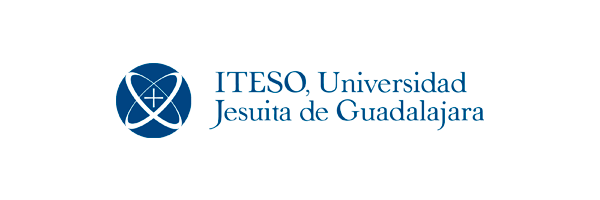

#### FECHA ENTREGA:06/03/2023




## Marianne Trujillo Altamirano 740694

marianne.trujillo@iteso.mx

## Úrsula Vargas López  740388

ursula.vargas@iteso.mx

## Carlos Riolo Sotelo 735124

carlos_riolo@iteso.mx



# **Objetivos**
### Objetivo General
Máxmizar el rendimiento de un portafolio de fibras en México, mediante las herramientas de Programación Lineal.

### Objetivo Específico
- Mediante modelos matemáticos y herramientas informáticas, tomar como base las restricciones del inversionista para definir la  cantidad ideal a invertir en cada sector (Industrial, Habitacional, Oficinas o Comercial), así como en cada uno de los proyectos (fibras), tomando en cuenta los mínimos y máximos de inversión que éstas mismas requieren.


# **Modelo que representa el Problema**

## Planteamiento 
Dados diferentes tipos de propiedades, un inversionista que busca mejorar su estrategia de inversión en su portafolio de fibras, puede invertir una cantidad máxima de $5,850,500 MXN en un total de 6 fibras. Para decidir la cantidad destinada a cada una de ellas toma en cuenta distintos criterios como la clasificación de la fibra (habitacional, comercial, industrial, oficina), no quiere invertir más del 40% del capital en el sector industrial, no más de 20% en habitacional y no más de 20% en oficina; cada fibra tiene un mínimo y un máximo de inversión particular, además de un rendimiento anual específico.


Existen seis (6) opciones de inversión con las letras correspondientes $x_i$

1. $x_1$:(THE WESLEY II; Tasa de retorno=$17\%$; Habitacional; mín $14,900$mxn ; max $558,750$mxn )
1. $x_2$:(CYPRESS BUSINESS PARK; Tasa de retorno=$16.38\%$; Industrial; mín $17,780 $ mxn; max $1,256,300 $mxn)
1. $x_3$:(STETRU PARK; Tasa de retorno=$17\%$; Industrial; mín $13,900 $mxn ; max $1,112,000 $mxn)
1. $x_4$:(PARQUE FERRAN V; Tasa de retorno=$17.72\%$; Industrial; mín $17,760 $mxn ; max $1,272,800 $mxn)
1. $x_5$:(EDERRA STREET MALL & FERRAN ; Tasa de retorno=$19\%$; Comercial; mín $ 14,340$mxn; max $1,426,830 $mxn))
1. $x_6$:(B CENTRAL; Tasa de retorno=$16.76\%$; Oficina; mín $11,150 $mxn; max $1,226,500 $mxn)

Lo que se quiere entonces es maximizar el retorno que deja la inversión.

La solución de este problema puede ser descrita como:

$$\max_{x_1,x_2,...,x_6}\sum^{6}_{i=1} x_iR_i,$$

donde $x_i$ representa la cantidad invertida en la opción, y $R_i$ representa la tasa de retorno respectiva.

**1.- Maximizar el rendimiento**

**2.- Variables**

$x_1,x_2,x_3,x_4,x_5,x_6$

**3.-Función costo**

$f(x_1,x_2,...x_6)=1.17x_1+1.1638x_2+1.17x_3+1.1772x_4+1.19x_5+1.1676x_6$

**4.- Restricciones**

$$x_1 + x_2 + x_3 + x_4 + x_5 + x_6 \leq 5850500$$
$$x_2 + x_3 + x_4 \geq 2340200$$
$$x_1 \leq 558750$$
$$x_1 \geq 14900$$
$$x_2 \leq 1256300$$
$$x_2 \geq 14780$$
$$x_3 \leq 1112000$$
$$x_3 \geq 13900$$
$$x_4 \leq 1272800$$
$$x_4 \geq 17600$$
$$x_5 \leq 1426830$$
$$x_5 \geq 14340$$
$$x_6 \leq 1226500$$
$$x_6 \geq 11150$$
$$x_5 \leq 1170100$$
$$x_6 \leq 1170100$$

# Solución del Problema

In [1]:
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [8]:
data= pd.read_csv("ExcelProyecto_Fibras.csv")
data

,FIBRA,Rendimiento
0,THE WESLEY II,17%
1,CYPRESS BUSINESS PARK,16.38%
2,STETRU PARK,17%
3,PARQUE FERRAN V,17.72%
4,EDERRA STREET MALL & FERRAN,19%
5,B CENTRAL 270,16.76%


In [10]:
bank=5850500
rend=data["Rendimiento"]
rend


0       17%
1    16.38%
2       17%
3    17.72%
4       19%
5    16.76%
Name: Rendimiento, dtype: object

In [12]:
c=([
    [-1.17  , -1.1638, -1.17  , -1.1772, -1.19  , -1.1676]
])

Aub=np.array([ [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],  #Restricción 1, menor que 5850500
               [0.0, 1.0, 1.0, 1.0, 0.0, 0.0],  #Restricción 2, menor al 40% del Bank
               [1.0, 0.0, 0.0, 0.0, 0.0, 0.0],  #Restricción 3, x_1 menor que 558750
               [-1.0, 0.0, 0.0, 0.0, 0.0, 0.0], #Restricción 4, x_1 mayor que 14900
               [0.0, 1.0, 0.0, 0.0, 0.0, 0.0],  #Restricción 5, x_2 menor que 1256300
               [0.0, -1.0, 0.0, 0.0, 0.0, 0.0], #Restricción 6, x_2 mayor que 14780
               [0.0, 0.0, 1.0, 0.0, 0.0, 0.0],  #Restricción 7, x_3 menor que 1112000
               [0.0, 0.0, -1.0, 0.0, 0.0, 0.0], #Restricción 8, x_3 mayor que 13900
               [0.0, 0.0, 0.0, 1.0, 0.0, 0.0],  #Restricción 9, x_4 menor que 1272800
               [0.0, 0.0, 0.0, -1.0, 0.0, 0.0], #Restricción 10, x_4 mayor que 17600
               [0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  #Restricción 11, x_5 menor que 1426830
               [0.0, 0.0, 0.0, 0.0, -1.0, 0.0], #Restricción 12, x_5 mayor que 14340
               [0.0, 0.0, 0.0, 0.0, 0.0, 1.0],  #Restricción 13, x_6 menor que 1226500
               [0.0, 0.0, 0.0, 0.0, 0.0, -1.0], #Restricción 14, x_6 mayor que 11150
               [1.0, 0.0, 0.0, 0.0, 0.0, 0.0],  #Restricción 15, x_1 menor al 20% del Bank
               [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]  #Restricción 16, x_6 menor al 20% del Bank
             ])

bub=np.array([bank,
              bank*.4,
              558750,
              14900,
              1256300,
              14780,
              1112000,
              13900,
              1272800,
              17600,
              1426830,
              14340,
              1226500,
              11150,
              bank*.2,
              bank*.2
             ])

resp=opt.linprog(c,Aub,bub)
resp

           con: array([], dtype=float64)
 crossover_nit: 0
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: -6465072.12
       ineqlin:  marginals: array([-0.    , -1.17  , -1.17  , -0.    , -0.    , -0.    , -0.    ,
       -0.    , -0.0072, -0.    , -1.19  , -0.    , -0.    , -0.    ,
       -0.    , -1.1676])
  residual: array([ 354620.,       0.,       0.,  573650., 1256300.,   14780.,
         44600., 1081300.,       0., 1290400.,       0., 1441170.,
         56400., 1181250.,  611350.,       0.])
         lower:  marginals: array([0.    , 0.0062, 0.    , 0.    , 0.    , 0.    ])
  residual: array([ 558750.,       0., 1067400., 1272800., 1426830., 1170100.])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: 1
         slack: array([ 354620.,       0.,       0.,  573650., 1256300.,   14780.,
         44600., 1081300.,       0., 1290400.,       0., 1441170.,
         56400., 1181

## Interpretación de Resultados

Para maximizar el rendimiento del portafolio de Fibras:
- En The Wesley II se tienen que invertir $558,750 mxn

- En The Cypress Business Park se tienen que invertir $0.00 mxn

- En Stretu Park se tienen que invertir $1,067,400 mxn 

- En Parque Ferran V se tienen que invertir $1,272,800 mxn

- En Ederra Street Mall & Ferran se tienen que invertir $1,426,830 mxn

- En B Central 270 se tienen que invertir $1,170,100 mxn

#### Con un retorno total de $ 6,465,072.12 mxn

# Visualización de la Solución del Problema


<BarContainer object of 6 artists>

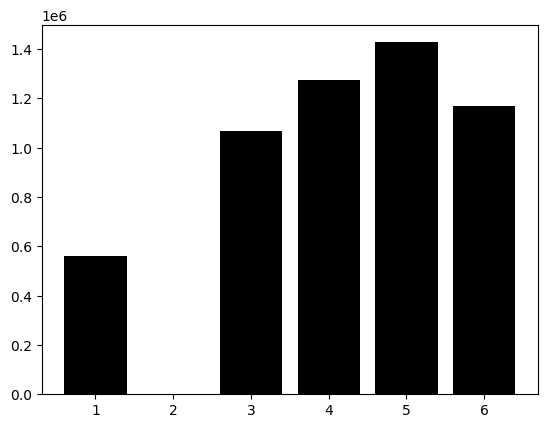

In [13]:
plt.figure()
plt.bar([1,2,3,4,5,6], [resp.x[0],resp.x[1],resp.x[2],resp.x[3],resp.x[4],resp.x[5]], color="black")

In [14]:
resp.x[0]

558750.0

### 2.6 Conclusiones.

Hemos logrado exitosamente el maximizar el rendimiento del portafolio de nuestro inversionista con el uso de herramientas como la optimización, el uso de restricciones e incluso de gráficos.
Como conclusión, el uso de herramientas de programación se vuelve útil y en casos fundamental para el cálculo de cantidades ideales a invertir cuando se toman en cuenta diversas variables que afectan nuestra función de maximización o minimización.



### 2.7 Referencias.

Engineering, 1.L. (s. f.). 100 Ladrillos. Cobra rentas,Gana plusvalía.
https://100ladrillos.com/?utm_source=google


